In [1]:
#link for probability distribution functions https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import t
'''
a: alpha (nível de confiança equivale a 1-a)
N: Tamanho da população
sd: desvio-padrão envolvido no cálculo
sdSampleSize: tamanho da amostra da qual obteve-se sd
isToProportion: se True, estuda-se o tamanho amostral para proporção. 
Se False, esrtuda a média em geral. 
'''
def confidenceInterval(sample = None, confidenceLevel=None, N=None
                              , populationalSd=None):
    n=len(sample)
    sampleMean = pd.Series(sample).mean(skipna=True)
    sampleMean = round(sampleMean, 3)
    v_1_alpha_2 = 1-(1-confidenceLevel)/2; 
    quant_m = None; text=""; sd = None
    if populationalSd is not None:#sd is the parameter value
        quant_m = round(norm.ppf(v_1_alpha_2), 2)
        sd = populationalSd
    else:#sd is an  estimate of the parameter
        quant_m = round(t.ppf(v_1_alpha_2, df=(n-1)), 3)#QUANTIL DA T-STUDENT
        text += ", df="+ str(n-1)
        sd = pd.Series(sample).std(skipna=True)
        sd = round(sd, 3)
    correctionFactor = np.sqrt((N-n)/(N-1)) if N is not None else 1
    correctionFactor = round(correctionFactor, 3)
    sd_sampleMean = (sd/np.sqrt(n))*correctionFactor
    sd_sampleMean = round(sd_sampleMean, 3)
    lower = sampleMean - quant_m*sd_sampleMean
    upper = sampleMean + quant_m*sd_sampleMean
    lower = round(lower, 3)
    upper = round(upper, 3)
    print("quant_m=", quant_m, ", sampleMean=", sampleMean
                , ", sd_sampleMean=",sd_sampleMean
                , ", lower=", lower, ", upper=", upper, text, sep="")
    #print(paste(, sep=""))
    # return(list(lower=lower, upper=upper))



quant_m=1.96, sampleMean=0.661, sd_sampleMean=0.224, lower=0.222, upper=1.1


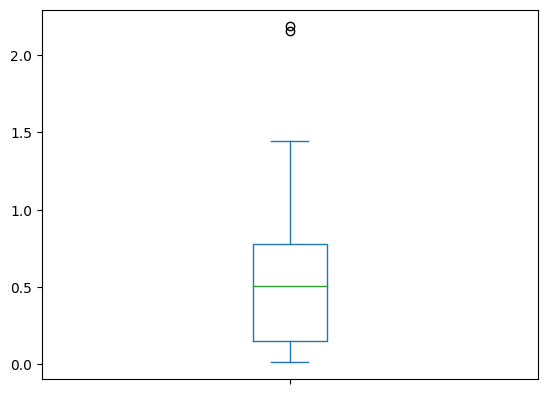

In [2]:
#MÉDIA GERAL
#link for random generation https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.beta.html#numpy.random.Generator.beta
sampleContinuous = np.random.default_rng().exponential(scale=1, size=20)
pd.Series(sampleContinuous).mean(skipna=True)
pd.Series(sampleContinuous).plot(kind="box");

#MÉDIA GERAL - POPULAÇÃO INFINITA E VARIÂNCIA CONHECIDA
confidenceInterval(sample = sampleContinuous, confidenceLevel = .95
                   , N = None, populationalSd = 1)


In [4]:
#MÉDIA GERAL - POPULAÇÃO INFINITA E VARIÂNCIA DESCONHECIDA
confidenceInterval(sample = sampleContinuous, confidenceLevel = .95
                   , N = None, populationalSd = None)


quant_m=2.093, sampleMean=0.661, sd_sampleMean=0.148, lower=0.351, upper=0.971, df=19


In [3]:
#MÉDIA GERAL - POPULAÇÃO FINITA E VARIÂNCIA DESCONHECIDA
confidenceInterval(sample = sampleContinuous, confidenceLevel = .95
                   , N = 100, populationalSd = None)


quant_m=2.093, sampleMean=0.661, sd_sampleMean=0.133, lower=0.383, upper=0.939, df=19


In [13]:
#binarySample = sample
def confidenceIntervalForProportion (binarySample = None, N=None, 
                                          confidendeLevel = .93, isConservative=True):
    p_obs = pd.Series(binarySample).mean(skipna=True)
    n= len(binarySample)
    correctionFactor = np.sqrt((N-n)/(N-1)) if N is not None else 1
    sigma = .5 if isConservative else np.sqrt(p_obs*(1-p_obs))
    sigma_p = (sigma/np.sqrt(n)) *correctionFactor
    alpha = 1 - confidendeLevel
    z = norm.ppf(1-alpha/2)
    l = p_obs - z*sigma_p
    u = p_obs + z*sigma_p
    p_obs = round(p_obs, 3)
    l = round(l, 3) if l >= 0 else 0
    u = round(u, 3) if u <=1 else 1
    print("p_obs, (l, u): " + str(p_obs)+ ", ["+ str(l)+ ", "+ str(u)+ "]")

In [16]:
#PROPORÇÃO
binarySample = np.random.default_rng().binomial(n = 1, p=.3, size = 20)
#PROPORÇÃO - POPULAÇÃO INFINITA E ABORDAGEM CONSERVADORA
confidenceIntervalForProportion(binarySample = binarySample, N = None,
                                isConservative = True, confidendeLevel = .999)


p_obs, (l, u): 0.25, [0, 0.618]


In [17]:
#PROPORÇÃO - POPULAÇÃO INFINITA E ABORDAGEM OUSADA
confidenceIntervalForProportion(binarySample = binarySample, N = None,
                                isConservative = False, confidendeLevel = .999)

p_obs, (l, u): 0.25, [0, 0.569]


In [18]:
#PROPORÇÃO - POPULAÇÃO FINITA E ABORDAGEM OUSADA
confidenceIntervalForProportion(binarySample = binarySample, N = 100,
                                isConservative = False, confidendeLevel = .93)


p_obs, (l, u): 0.25, [0.092, 0.408]
